-------------------------------------------------------
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64


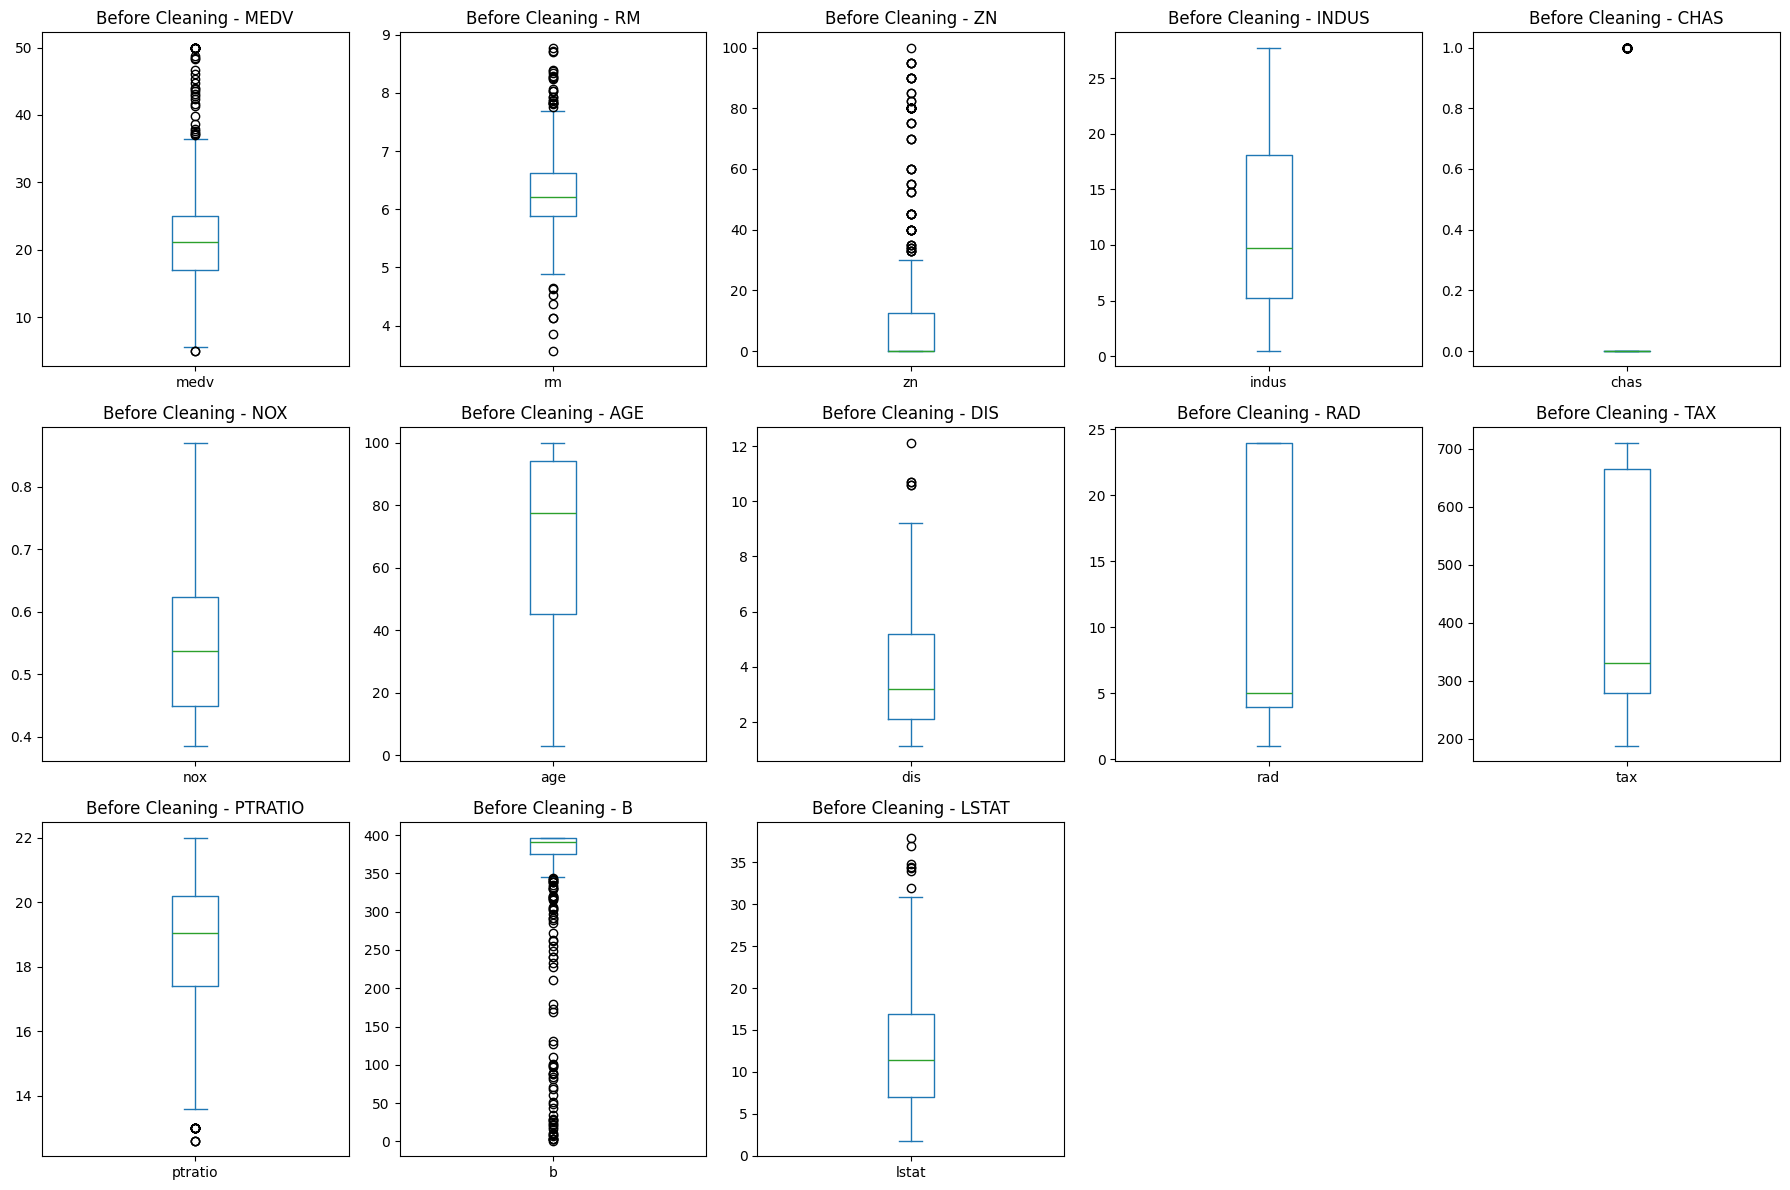

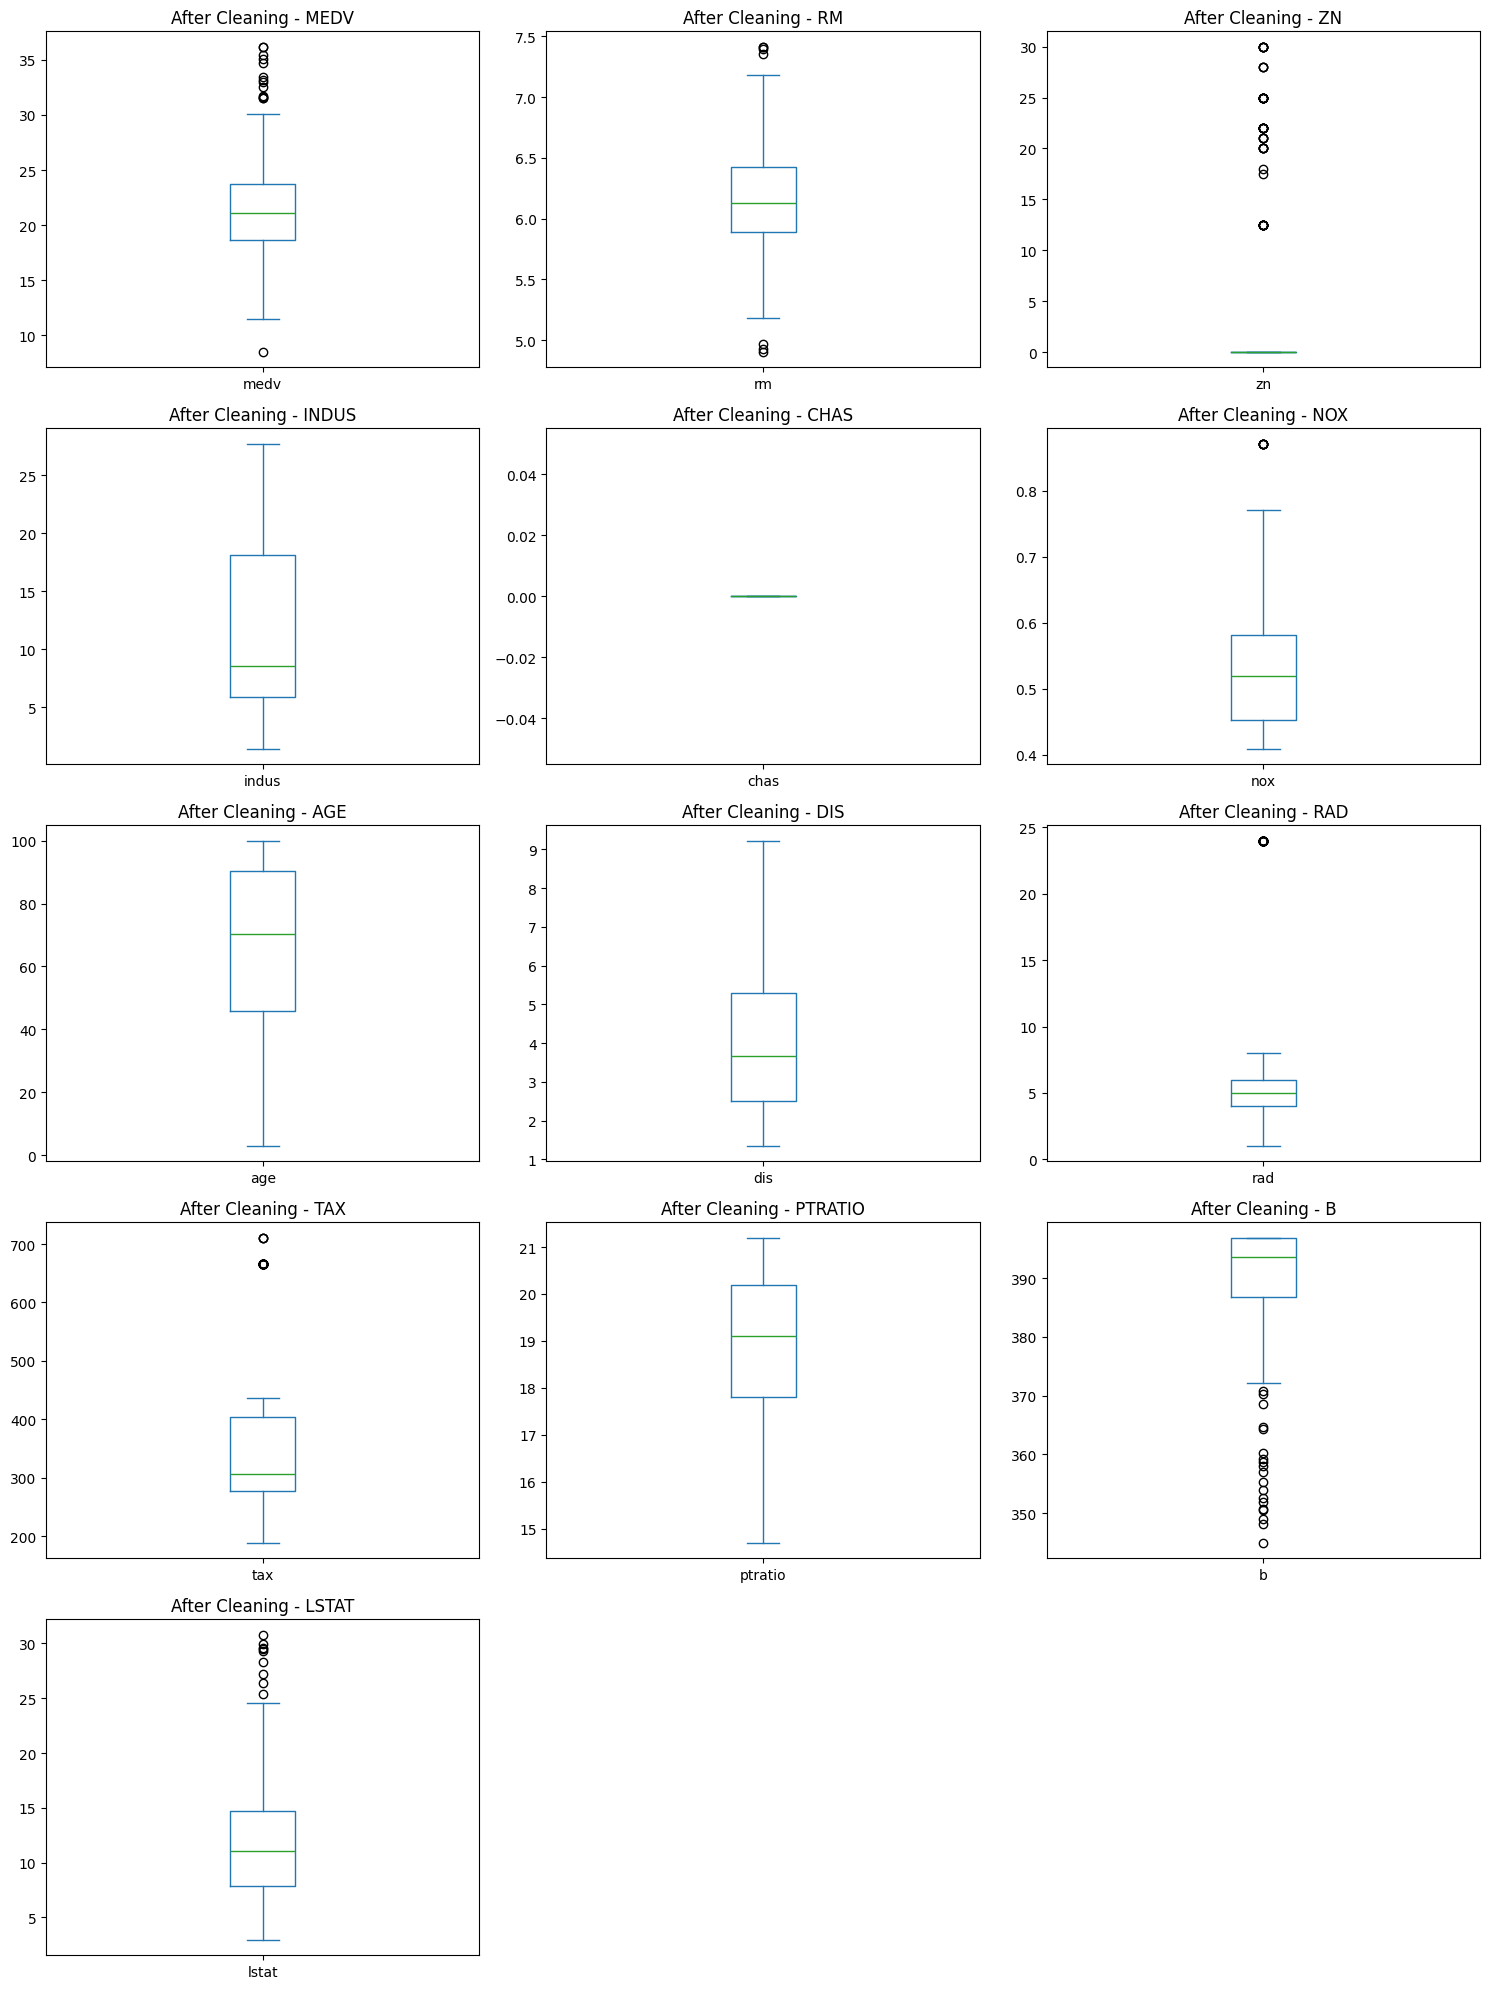

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

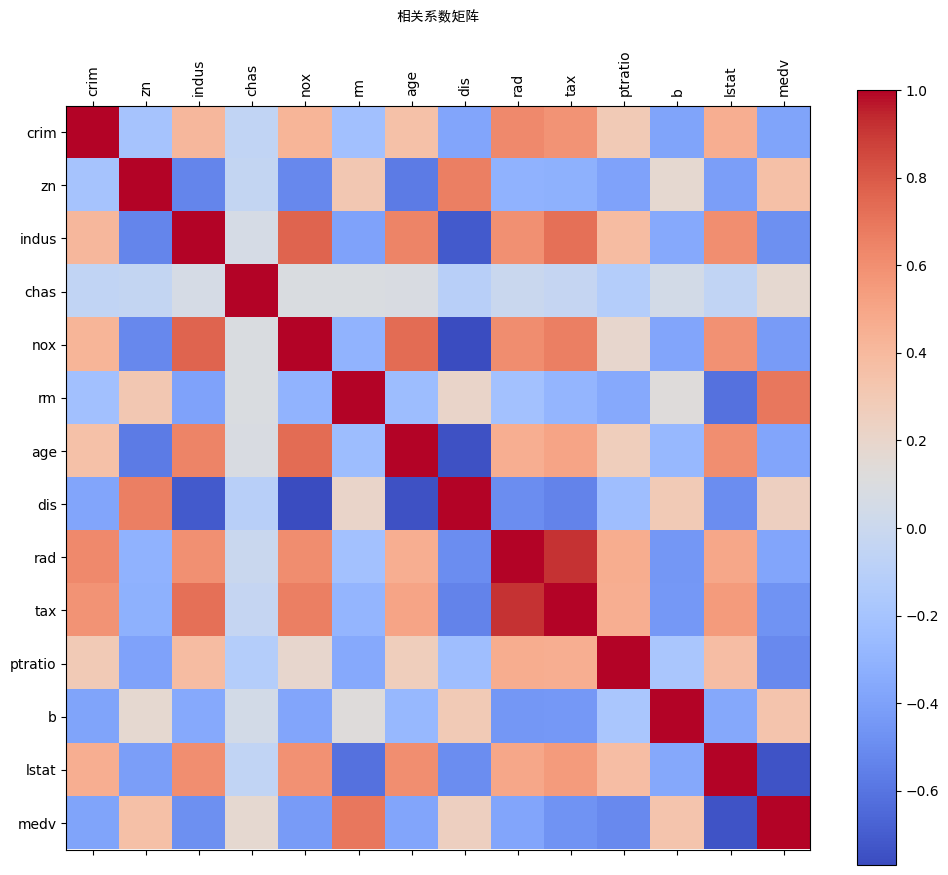

LinearRegression 最佳参数: {}
Ridge 最佳参数: {'alpha': 10.0}
Lasso 最佳参数: {'alpha': 0.1}
SVR 最佳参数: {'C': 10.0, 'kernel': 'rbf'}
RandomForest 最佳参数: {'max_depth': 20, 'n_estimators': 50}
-------------------------------------------------------
---MSE : 衡量预测值与实际值之间的平均平方误差，值越小越好。---

RandomForest - 计算均方误差 (MSE): 8.07400945009804
-------------------------------------------------------

--- R² : 反映模型解释数据变异的程度，值越接近1越好---

RandomForest - 决定系数 (R²): 0.8899005464855595

-------------------------------------------------------

---耗时---训练数据得分---测试数据得分-------------
elaspe:0.000000;train_score:0.940930;test_score:0.805629
-------------------------------------------------------
多项式次数 2 - 均方误差 (MSE): 14.257338168909754
多项式次数 2 - 决定系数 (R²): 0.8055829447972125
多项式次数 3 - 均方误差 (MSE): 16476.011012737505
多项式次数 3 - 决定系数 (R²): -223.6714993104543
多项式次数 4 - 均方误差 (MSE): 1016.8009239852063
多项式次数 4 - 决定系数 (R²): -12.86538209493798
多项式次数 5 - 均方误差 (MSE): 504.88053946720254
多项式次数 5 - 决定系数 (R²): -5.884692398364725


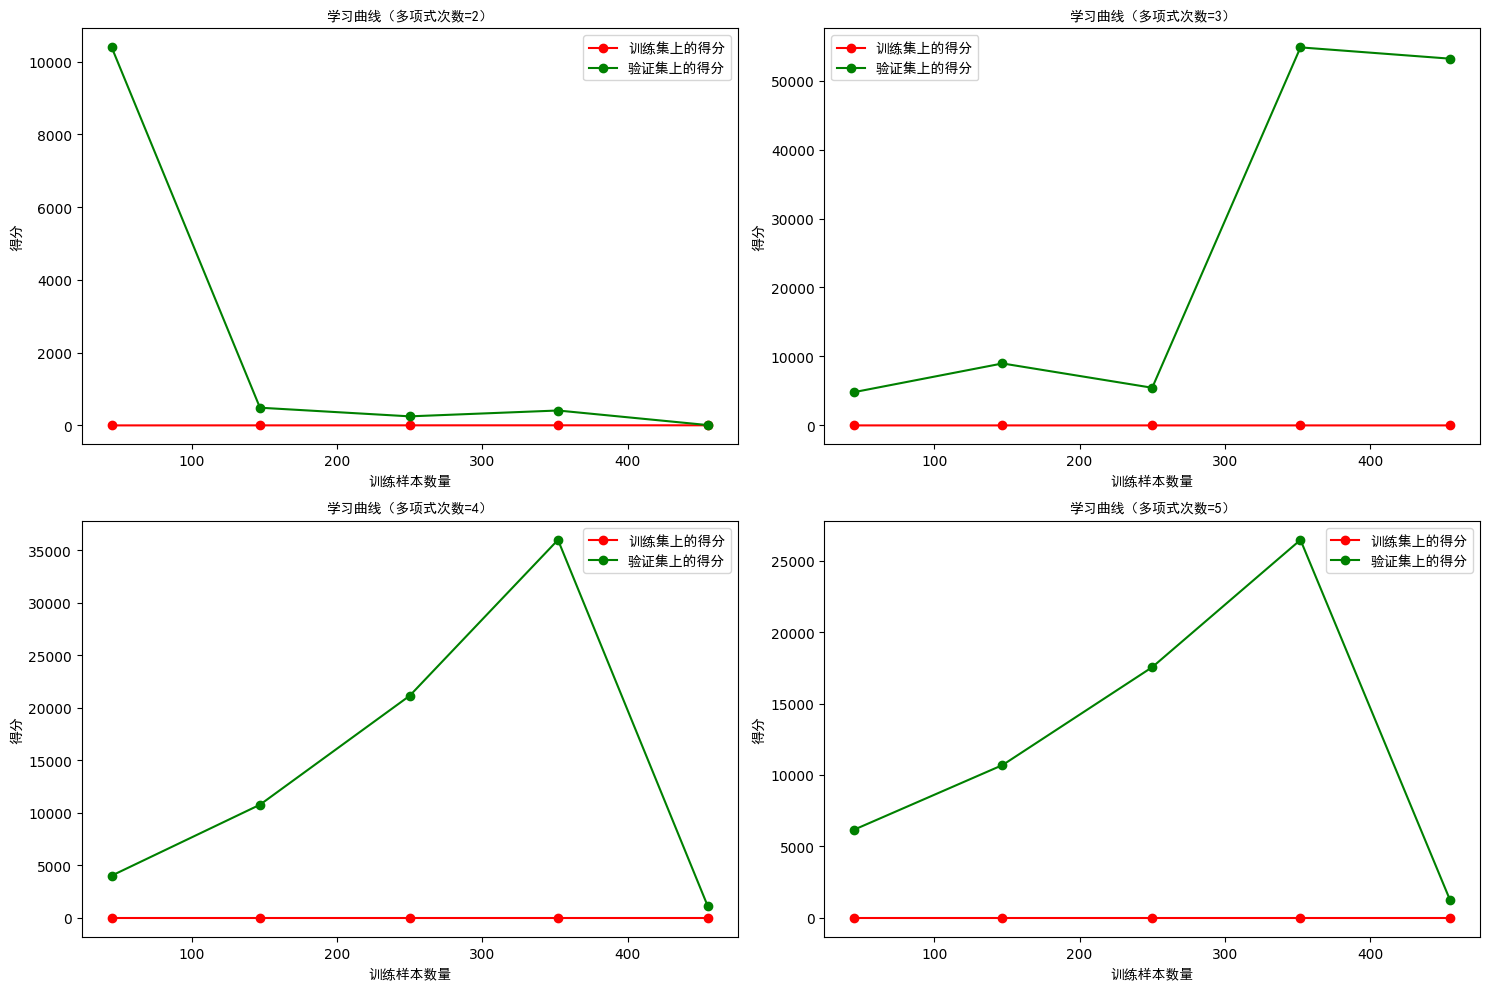

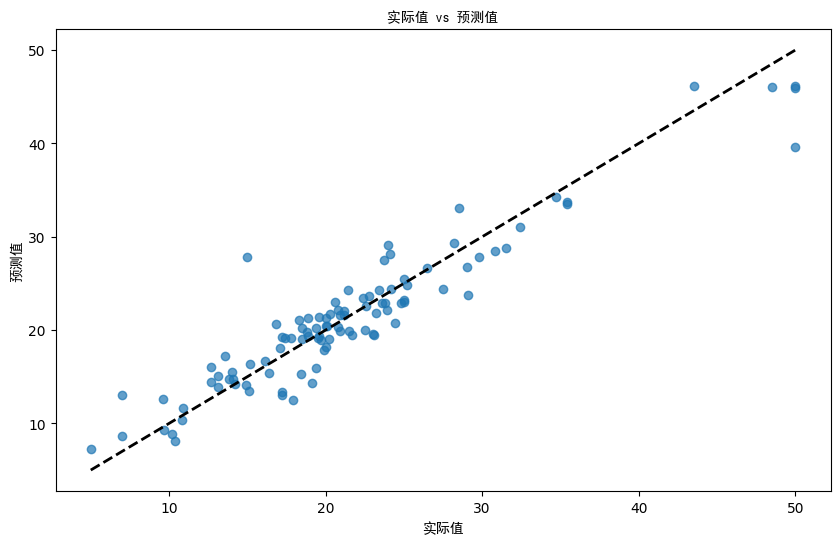

In [6]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt  # 数据可视化
import pandas as pd  # 数据处理和分析
import numpy as np  # 科学计算
import time # 测量代码段的执行时间

from sklearn.pipeline import Pipeline # 管理机器学习工作流程
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV  # 数据划分、交叉验证、学习曲线、网格搜索
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # 数据标准化、多项式特征
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # 回归模型
from sklearn.svm import SVR  # 支持向量回归
from sklearn.ensemble import RandomForestRegressor  # 随机森林回归
from sklearn.metrics import mean_squared_error, r2_score  # 模型评估

# 影响因素
# CRIM（人均犯罪率） ; NOX（一氧化氮浓度） ; RM（住宅房间数）; AGE（1940年以前建造的住宅比例）; DIS（距离波士顿五个主要就业中心的加权距离）
# RAD（高速公路可达性指数） ; TAX（每万美元的财产税率） ; PTRATIO（师生比）; B（黑人比例） ; LSTAT（低收入人群比例）; MEDV（自住房屋的中位数价格）

# 加载数据集
file_path = 'C:\\Users\\10075\\Downloads\\Ai-Study\\DataSet\\Boston Housing.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# 修正目标列名，去除多余空格
data.rename(columns={'medv ': 'medv'}, inplace=True)


# 显示数据集的基本信息
print('-------------------------------------------------------')
print(data.head())  # 显示数据集前几行
print('-------------------------------------------------------')
print(data.info())  # 显示数据集基本信息_如列数、列名、非空值数量、数据类型等
print('-------------------------------------------------------')
print(data.describe())  # 显示数据集描述性统计信息
print('-------------------------------------------------------')
print(data.isnull().sum())  # 检查数据集中各列的缺失值数量_计算每列的缺失值数量
print('-------------------------------------------------------')

# 数据清洗前的数据分布可视化

plt.figure(figsize=(18, 12))  # 增加图形大小去适应多个子图

features = ['medv', 'rm', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
titles = ['MEDV', 'RM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# 确保每个特征都有一个子图
for i, (feature, title) in enumerate(zip(features, titles)):
    plt.subplot(3, 5, i + 1)  # 3行5列，索引从1开始
    data[feature].plot(kind='box')
    plt.title(f'Before Cleaning - {title}')

plt.tight_layout()  # 调整子图间距
plt.show()  # 显示图形

# 处理缺失值
data.fillna(data.median(), inplace=True)

# 计算IQR并过滤异常值
# IQR_四分位距法:识别数据集中异常值的统计技术。
# 它基于数据的分布特性，特别是数据的四分位数。
# IQR 是第三四分位数（Q3）和第一四分位数（Q1）之间的差值，表示数据中间50%的分布范围。
Q1 = data.quantile(0.25) # 下四分位数，它是将数据集中数值较小的一半分开的值。在排序后的数据中，Q1 是位于25%位置的值。
Q3 = data.quantile(0.75) # 上四分位数，它是将数值较大的一半数据分开的值。Q3 是位于75%位置的值。
IQR = Q3 - Q1 
# 上界（Upper Bound）：Q3 + 1.5 * IQR
# 下界（Lower Bound）：Q1 - 1.5 * IQR
is_outlier = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
data_cleaned = data[~is_outlier.any(axis=1)]

# 数据清洗后的数据分布可视化
plt.figure(figsize=(15, 20))  # 增加图形大小去适应多个子图


features = ['medv', 'rm', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
titles = ['MEDV', 'RM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# 确保每个特征都有一个子图
for i, (feature, title) in enumerate(zip(features, titles)):
    ax = plt.subplot(5, 3, i + 1)  # 使用5行3列的布局
    data_cleaned[feature].plot(kind='box', ax=ax, title=f'After Cleaning - {title}')

plt.tight_layout()  # 调整子图间距
plt.show()

# 计算并显示各特征之间的相关性
correlation_matrix = data.corr()
print(correlation_matrix)

# 可视化相关系数矩阵
plt.figure(figsize=(12, 10))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1) # 热力图显示相关系数
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)  # x轴标签
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns) # y轴标签
plt.title('相关系数矩阵', pad=20, fontproperties='SimHei') # 设置标题和标题间距
plt.show()

# 数据预处理
X = data.drop('medv', axis=1)  # 将数据分为特征变量（X）和目标变量（y）_从数据中删除目标列，保留特征

y = data['medv'] # 目标列

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 划分训练集和测试集

# 特征标准化
scaler = StandardScaler()  # 实例化标准化器
X_train = scaler.fit_transform(X_train) # 对训练数据进行标准化
X_test = scaler.transform(X_test)  # 对测试数据进行标准化

# 定义要评估的模型和参数
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor()
}

params = {
    'LinearRegression': {},
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 0.5, 1.0]},
    'SVR': {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'poly', 'rbf']},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

# 进行网格搜索和交叉验证

best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_ # 存储最佳模型
    print(f'{name} 最佳参数: {grid_search.best_params_}')
print('-------------------------------------------------------')

# 评估每个模型的性能
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
print('---MSE : 衡量预测值与实际值之间的平均平方误差，值越小越好。---')
print('')
print(f'{name} - 计算均方误差 (MSE): {mse}')
print('-------------------------------------------------------')
print('')
print('--- R² : 反映模型解释数据变异的程度，值越接近1越好---')
print('')
print(f'{name} - 决定系数 (R²): {r2}')
print('')
print('-------------------------------------------------------')

print('')
print('---耗时---训练数据得分---测试数据得分-------------')
# 模型评分和时间记录
def polynomial_model(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())  # 定义多项式回归模型
    ])

model = polynomial_model(degree=2) # 实例化模型
start = time.process_time() # 记录开始时间
model.fit(X_train, y_train)  # 训练模型
train_score = model.score(X_train, y_train) # 训练集得分
test_score = model.score(X_test, y_test) # 测试集得分
print("elaspe:{0:.6f};train_score:{1:0.6f};test_score:{2:.6f}"
      .format(time.process_time() - start, train_score, test_score))  # 打印训练时间和得分
print('-------------------------------------------------------')

# 多项式回归优化模型，并展示不同多项式次数的学习曲线
degrees = [2, 3, 4, 5]  # 尝试不同的多项式次数
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    scaler_poly = StandardScaler()
    X_train_poly = scaler_poly.fit_transform(X_train_poly)
    X_test_poly = scaler_poly.transform(X_test_poly)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train_poly)
    y_pred_poly = model_poly.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
    r2_poly = r2_score(y_test_poly, y_pred_poly)

    print(f'多项式次数 {degree} - 均方误差 (MSE): {mse_poly}')
    print(f'多项式次数 {degree} - 决定系数 (R²): {r2_poly}')

    train_sizes, train_scores, test_scores = learning_curve(model_poly, X_poly, y, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

    train_scores_mean = np.sqrt(-train_scores).mean(axis=1)
    test_scores_mean = np.sqrt(-test_scores).mean(axis=1)

    plt.subplot(2, 2, i+1)
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='训练集上的得分')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='验证集上的得分')
    plt.xlabel('训练样本数量', fontproperties='SimHei')
    plt.ylabel('得分', fontproperties='SimHei')
    plt.title(f'学习曲线（多项式次数={degree}）', fontproperties='SimHei')
    plt.legend(loc='best', prop={'size': 10, 'family': 'SimHei'})

plt.tight_layout()
plt.show()

# 可视化预测值与实际值的散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('实际值', fontproperties='SimHei')
plt.ylabel('预测值', fontproperties='SimHei')
plt.title('实际值 vs 预测值', fontproperties='SimHei')
plt.show()
